# Research on Marketing Expense


Your first task is to help optimize marketing expenses.

**You have:**
* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period

**Marketing expenses statistics:**
* You are going to study:
* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

**Description of the data:**

**The visits table (server logs with data on website visits):**
* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from
* All dates in this table are in YYYY-MM-DD format.

**The orders table (data on orders):**
* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order

**The costs table (data on marketing expenses):**
* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day


## Step 1. Download the data and prepare it for analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the visits_log_us dataset & orders_log_us dataset & costs_log_us dataset
visits_test = pd.read_csv('/Users/fanibhushan/Downloads/visits_log_us.csv')
orders = pd.read_csv('/Users/fanibhushan/Downloads/orders_log_us.csv')
expenses = pd.read_csv('/Users/fanibhushan/Downloads/costs_us.csv')

In [3]:
#exact size of the data
visits_test.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


As the dataset has large memory so it's good to convert the datatypes. As the device column had is category type so it better to change from object to category & date to datetime. This will help in reducing the size.We've managed to make it smaller by changing the data type.

In [4]:
#Optimize the data for analysis
visits = pd.read_csv('/Users/fanibhushan/Downloads/visits_log_us.csv',  
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])

In [5]:
#exact size of the data
visits.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Now our DataFrame is 11.3 Megabytes instead of 79.3

In [6]:
#convert the column name in lower case
visits.columns = visits.columns.str.lower()
visits.columns = ['device','end_ts','source_id','start_ts','uid']
visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Column name converted to lower case and removed the space.

In [7]:
#exact size of the data
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


In [8]:
#convert the column name in lower case
orders.columns = orders.columns.str.lower()
orders.columns = ['buy_ts','revenue','uid']
orders.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [9]:
#exact size of the data
expenses.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


Now our DataFrame is 206.2 Kilobytes instead of 4.4 Megabytes

In [10]:
# convert the dates to datetime for all the data sets
#visits_dataset
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
#orders_dataset
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
#expenses_dataset
expenses['dt'] = pd.to_datetime(expenses['dt'])

The columns start_ts and end_ts and buy_ts and dt contain the date and time. We converted the object type to date with the to_datetime() method for all the three dataset containing date column.

## Step 2. Make reports and calculate metrics:

### Product

#### How many people use it every day, week, and month?

In [11]:
#people use it every day, week, and month
visits['year']= visits['start_ts'].dt.year
visits['month'] = visits['start_ts'].dt.month
visits['week'] = visits['start_ts'].dt.week
visits['date'] = visits['start_ts'].dt.date

mau = visits.groupby(['year','month']).agg({'uid':'nunique'}).reset_index()
wau = visits.groupby(['year','week']).agg({'uid':'nunique'}).reset_index()
dau = visits.groupby('date').agg({'uid':'nunique'}).reset_index()

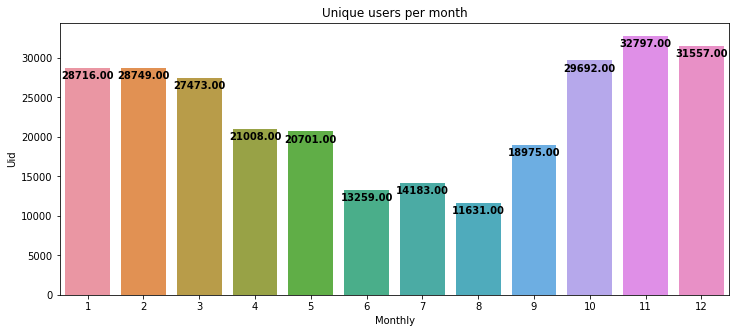

In [12]:
#how many people use it monthly
mau
#MAU BAR PLOT
plt.figure(figsize=(12,5))
barplot = sns.barplot(x = 'month',y = 'uid',data = mau)
plt.xlabel("Monthly")
plt.ylabel("Uid")
plt.title("Unique users per month")

for row in barplot.patches:
    barplot.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

From the bar graph we can say that after the third month there is number of customers decreases but between tenth to twelvth month there is significant increase in number of users. With novermber month has the hieghest number of users.

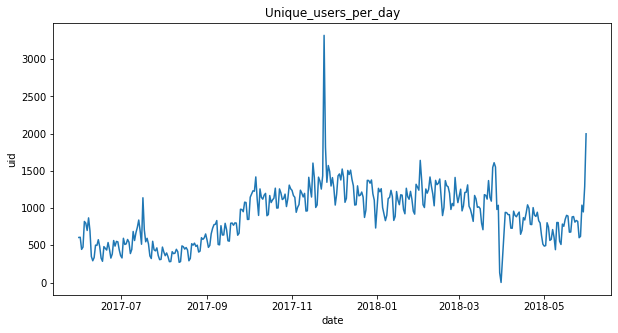

In [13]:
#how many people use it daily
dau
#DAU GRAPH
fig = plt.figure(figsize = (10, 5))
#creating a line graph
plt.plot(dau['date'], dau['uid'])
plt.title('Unique_users_per_day')
plt.xlabel('date')
plt.ylabel('uid')
plt.show()

From the above graph we can see that there was significant increase in number of daily customers during the december month of 2017 & during april month of 2018 there were significant decrease in number of daily customers.



In [14]:
# sticky factor
mau_total = visits.groupby(['year','month']).agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['year','week']).agg({'uid':'nunique'}).mean()
dau_total = visits.groupby('date').agg({'uid':'nunique'}).mean()
sticky_wau = (dau_total/wau_total)*100
sticky_mau = (dau_total/mau_total)*100
print("sticky_wau:",int(sticky_wau))
print("sticky_mau:",int(sticky_mau))

sticky_wau: 15
sticky_mau: 3


Number of unique users for every day & weekly & monthly: Bar graph shows the representation of number of unique users every month. Line graph shows number of unique users every day. Sticky_wau & sticky_mau these matrix tells us how loyal our audience is- how often do they visit WAU: 15% users come back weekly & MAU: 3% users come back monthly.

#### How many sessions are there per day?

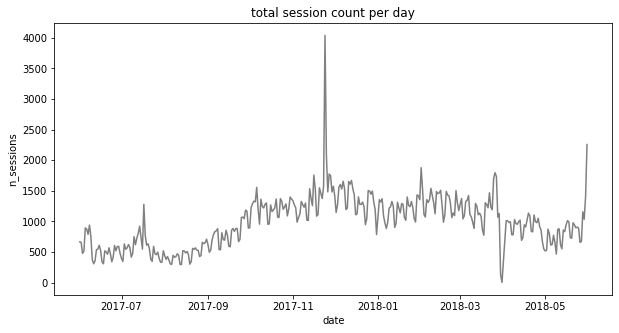

In [15]:
#sessions per day
sessions_per_user = visits.groupby('date').agg({'uid':'count'}).reset_index()
sessions_per_user.columns = ['date','n_sessions']
sessions_per_user
# graph representation of number of sessions per day
fig = plt.figure(figsize = (10, 5))
#creating a line graph
plt.plot(sessions_per_user['date'], sessions_per_user['n_sessions'],color='grey')
plt.title('total session count per day')
plt.xlabel('date')
plt.ylabel('n_sessions')
plt.show()

This graph represent session count per day, as in the month of december 2017 there was significantly high number of customers visiting per day so we can see peak in sesssion count for dec 2017 & sames goes for decline in session count per day as very few people visited that time, hence leading to decline in session count for april month 2018.

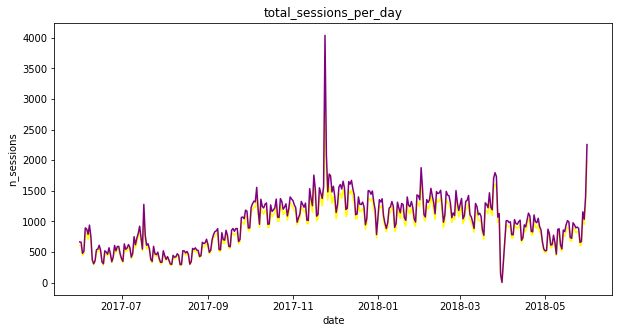

In [16]:
#comparing the dynamics of total sessions per day to the dynamics of DAU
fig = plt.figure(figsize = (10, 5))
#creating a line graph
plt.plot(dau['date'], dau['uid'],color ='yellow')
plt.plot(dau['date'],sessions_per_user['n_sessions'], color ='purple')
plt.title('total_sessions_per_day')
plt.xlabel('date')
plt.ylabel('n_sessions')
plt.show()

In [17]:
#average number of sessions per user
sessions_per_user = sessions_per_user.merge(dau,on='date')
sessions_per_user['avg_session_per_user'] = sessions_per_user['n_sessions']/sessions_per_user['uid']
print('Top_10',sessions_per_user.head(10))
print('Tail_10',sessions_per_user.tail(10))


Top_10          date  n_sessions  uid  avg_session_per_user
0  2017-06-01         664  605              1.097521
1  2017-06-02         658  608              1.082237
2  2017-06-03         477  445              1.071910
3  2017-06-04         510  476              1.071429
4  2017-06-05         893  820              1.089024
5  2017-06-06         875  797              1.097867
6  2017-06-07         788  699              1.127325
7  2017-06-08         939  868              1.081797
8  2017-06-09         755  695              1.086331
9  2017-06-10         375  350              1.071429
Tail_10            date  n_sessions   uid  avg_session_per_user
354  2018-05-22         943   886              1.064334
355  2018-05-23         894   811              1.102343
356  2018-05-24         907   833              1.088836
357  2018-05-25         886   821              1.079172
358  2018-05-26         655   602              1.088040
359  2018-05-27         672   620              1.083871
360  2018-

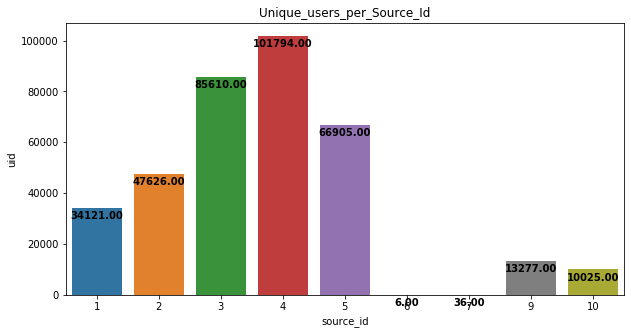

In [18]:
#sessions per device
sessions_per_device = visits.groupby('source_id').agg({'uid':'count'}).reset_index()
#barplot
plt.figure(figsize=(10,5))
session_per_device_bar=sns.barplot(x = 'source_id',y = 'uid',data = sessions_per_device)
plt.title('Unique_users_per_Source_Id')
plt.xlabel('source_id')
plt.ylabel('uid')

for row in session_per_device_bar.patches:
    session_per_device_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

Line graph shows representation of sessions per device. Checked the session based on different device and from the barplot we can clearly say platform 4 dominates the other platforms. Count of sessions were significantly high for platform 4.

#### What is the length of each session?

In [19]:
#length of each session
visits['visits_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['visits_duration_sec'].mean())

643.506488592098


Average difference between the length of each session is 643 seconds.

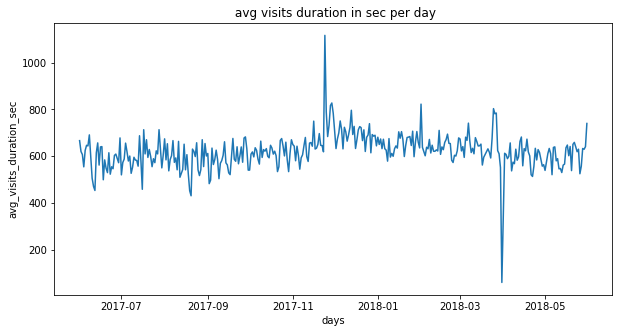

In [20]:
#plot to show how the difference was changing over days
visits_duration_sec_per_day = visits.groupby('date').agg({'visits_duration_sec':'mean'}).reset_index()
visits_duration_sec_per_day
fig = plt.figure(figsize = (10,5)) 
plt.plot(visits_duration_sec_per_day['date'],visits_duration_sec_per_day['visits_duration_sec'])
plt.xlabel("days")
plt.ylabel("avg_visits_duration_sec")
plt.title(" avg visits duration in sec per day")
plt.show()

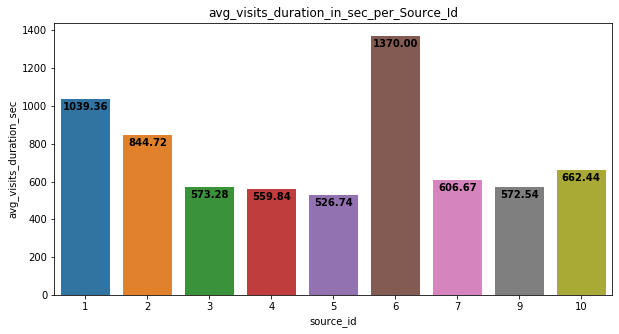

In [21]:
#how the difference changes over devices
length_per_device = visits.groupby('source_id').agg({'visits_duration_sec':'mean'}).reset_index()
plt.figure(figsize=(10,5))
length_per_device_bar= sns.barplot(x = 'source_id',y = 'visits_duration_sec',data = length_per_device)
plt.title('avg_visits_duration_in_sec_per_Source_Id')
plt.xlabel('source_id')
plt.ylabel('avg_visits_duration_sec')

for row in length_per_device_bar.patches:
    length_per_device_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

On average length of each session is from customers who come from platform 6. On average they spend 1370 seconds customer coming from platform 6 which is significantly high when compared with customers coming from other platforms.

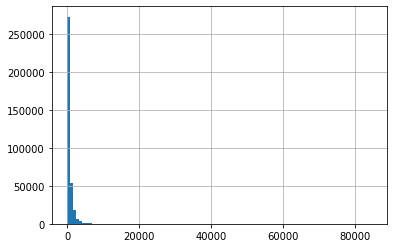

In [22]:
#histogram plot to look at the distribution
visits['visits_duration_sec'].hist(bins=100)
plt.show()

In [23]:
#histogram was not normally distributed so took the mode for visits_duration_sec
print(visits['visits_duration_sec'].mode())

0    60
dtype: int64


when the distribution is normal or close to normal we take mean or median but from the above histogram plot we can say that it is impossible so we calculated mode. 60 seconds is the length of each sessions.

#### How often do users come back?

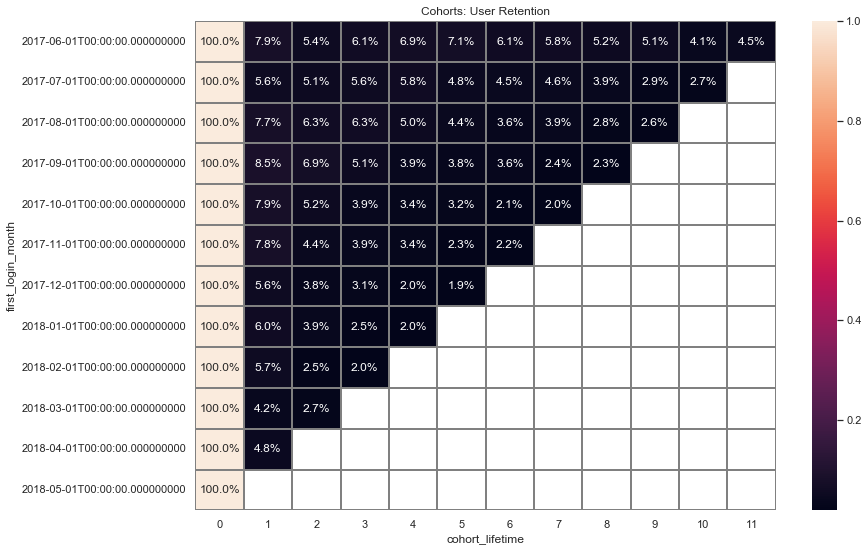

In [24]:
# retension rate
first_login_date = visits.groupby(['uid'])['date'].min()
first_login_date.name = 'first_login_date'
visits = visits.join(first_login_date,on='uid')
 
visits['first_login_month'] = visits['first_login_date'].astype('datetime64[M]')
visits['login_month'] = visits['date'].astype('datetime64[M]')
 
visits['cohort_lifetime'] = ((visits['login_month'] - visits['first_login_month']) / np.timedelta64(1, 'M')).round().astype(int)
 
cohorts = visits.groupby(['first_login_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

initial_users_count = cohorts[cohorts['cohort_lifetime']==0][['first_login_month','uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})


cohorts = cohorts.merge(initial_users_count,on='first_login_month')
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(index='first_login_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

#heatmap
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray') 
plt.show()

The first month retention rate is decreasing for some new cohort. Whereas the second month retention rate decreases more for some cohort that joined. This means that user behavior is changing with every new cohort. Maybe traffic sources have been badly chosen.

### Generl Conclusion for Product:

We calculated the number of daily active users(DAU),number of weekly active users(WAU), number of monthly active users(MAU). From this we get an idea about unique number of users viting every day, week & month.
Stickly factors gives us informtaion about loyal the cstomers are giving us information about how often they return so 15% users return weekly & 3% users return monthly.

Monthly: On 10th 11th & 12th month number of visits is significantly high.
Daily: We can see peek in daily visits near dec 2017 & decline in april 2018.
Sessions: As the number of visits were significantly high in dec 2017 so it contributed to significant peek in number of sessions during that time and same for the decline.
Platform 4 dominates all the other platform when it come to number of sessions, people coming through this platform has the height count of sessions.Whereas when it comes to avg length of each session then in that case platform 6 is clearly the leader.

On an average length of each session is 643 sec.Plotted a histogram to see the distribution but when the distribution is normal or close to normal we take mean or median but from the above histogram plot we can say that it is impossible so we calculated mode. 60 seconds is the length of each sessions.

Retension rate is high for the first cohort that is 2017-06-01.But starting with the second cohort retention rate starts decreasing.It tells us about how many users from a cohort have remained active compared to their initial number.

### Sales

#### When do people start buying?

In [25]:
#first purchase for each user
orders['month'] = orders['buy_ts'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
orders = orders.merge(first_orders, on='uid')
purchase_per_user = orders[['uid','month','first_order_month']]
purchase_per_user.head()

,uid,month,first_order_month
0,10329302124590727494,2017-06-01,2017-06-01
1,11627257723692907447,2017-06-01,2017-06-01
2,17903680561304213844,2017-06-01,2017-06-01
3,16109239769442553005,2017-06-01,2017-06-01
4,14200605875248379450,2017-06-01,2017-06-01


Tells us about the first time every customer ordered.

In [26]:
#first visit for each user
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
first_visits = visits.groupby('uid').agg({'visit_month': 'min'}).reset_index()
first_visits.columns = ['uid', 'first_visit_month']
visits = visits.merge(first_visits, on='uid')
visits_per_user = visits[['uid','source_id','first_visit_month']]
visits_per_user.head()

,uid,source_id,first_visit_month
0,16879256277535980062,4,2017-12-01
1,104060357244891740,2,2018-02-01
2,7459035603376831527,5,2017-07-01
3,16174680259334210214,9,2018-03-01
4,16174680259334210214,4,2018-03-01


Tells us about the first time customer visited.

In [27]:
#join the purchase_per_user & visits_per_user
users_visits_orders = visits_per_user.merge(purchase_per_user,on='uid').reset_index()
#select only uid, first_visit_month & first_order_month from users_visits_orders
users_first_visits_orders = users_visits_orders[['uid','first_visit_month','first_order_month']]
users_first_visits_orders

,uid,first_visit_month,first_order_month
0,16174680259334210214,2018-03-01,2018-03-01
1,16174680259334210214,2018-03-01,2018-03-01
2,16007536194108375387,2017-09-01,2017-09-01
3,16007536194108375387,2017-09-01,2017-09-01
4,16007536194108375387,2017-09-01,2017-09-01
...,...,...,...
761802,6752020629696526518,2017-12-01,2017-12-01
761803,11750532881998794555,2017-11-01,2017-11-01
761804,11202626539189016002,2017-11-01,2017-11-01
761805,12734910664455613822,2018-04-01,2018-04-01


When did customer visited & when did they actually ordered.

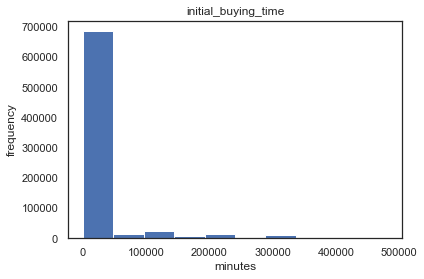

Minutes: 23430


In [28]:
# adding days_of_conversion column
users_first_visits_orders['day_of_conversion']= ((users_first_visits_orders['first_order_month'] - users_first_visits_orders['first_visit_month']
)/ np.timedelta64(1, 'm')).round().astype('int')

plt.hist(x='day_of_conversion',data=users_first_visits_orders)
plt.title('initial_buying_time')
plt.xlabel('minutes')
plt.ylabel('frequency')
plt.show()
print('Minutes:',round(users_first_visits_orders['day_of_conversion'].mean()))

Average buying time is 23430 minutes that is around 16 days.

#### How many orders do they make during a given period of time?

In [29]:
#orders made during a given time period
purchase_size= purchase_per_user.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
purchase_size.columns=['first_order_month','n_buyers']
purchase_size

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


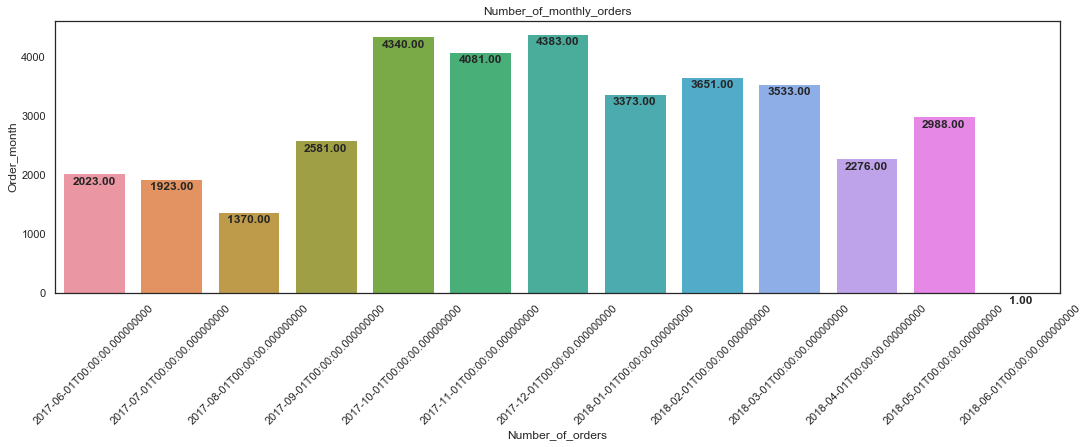

In [30]:
#graphical representation of monthly orders
plt.figure(figsize=(18,5))
purchase_size_bar =sns.barplot(x = 'first_order_month',y = 'n_buyers',data = purchase_size)
plt.title('Number_of_monthly_orders')
plt.xlabel('Number_of_orders')
plt.xticks(rotation=45)
plt.ylabel('Order_month')

for row in purchase_size_bar.patches:
    purchase_size_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()


Maximum number of order were there during 2017-10-01 & 2017-11-01 & 2017-12-01
&
Lowest number of orders were during 2017-08-01 & 2017-07-01 & 2017-06-01

#### What is the average purchase size?

In [31]:
# average purchase size
orders['revenue'].mean()

4.999646930476922

On an average purchase size is 5

In [32]:
visits_source = visits[['uid','source_id']]
visits_source.head()

,uid,source_id
0,16879256277535980062,4
1,104060357244891740,2
2,7459035603376831527,5
3,16174680259334210214,9
4,16174680259334210214,4


In [33]:
orders = orders.merge(visits_source,on='uid')
orders

,buy_ts,revenue,uid,month,first_order_month,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,3
...,...,...,...,...,...,...
761802,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,4
761803,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,5
761804,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,3
761805,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,4


In [34]:
# group revenue by source_id
revenue_per_source = orders.groupby('source_id').agg({'revenue':'mean'}).reset_index()
revenue_per_source

,source_id,revenue
0,1,9.242265
1,2,11.071013
2,3,6.344095
3,4,7.923842
4,5,7.781887
5,7,1.220000
6,9,3.806667
7,10,3.630303


Avergae purchase size per source. On an average orders from platform 2 generates more revenue as compared to others.

#### How much money do they bring? (LTV)

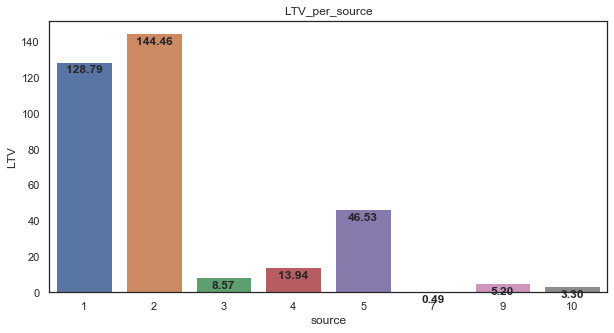

In [35]:
# money spent per source
orders_per_source = orders.groupby('source_id').agg({'uid':'nunique','revenue':'sum'}).reset_index()
orders_per_source.columns = ['source_id', 'n_buyers','revenue']


#calcularing ltv
margin =0.4
orders_per_source['gp'] = orders_per_source['revenue'] * margin
#report['age'] = ((report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype(int)
orders_per_source['ltv'] = orders_per_source['gp'] / orders_per_source['n_buyers']
orders_per_source

#LTV by source:graphical representation
plt.figure(figsize=(10,5))
source_order_bar = sns.barplot(x = 'source_id',y = 'ltv',data = orders_per_source)
plt.title('LTV_per_source')
plt.xlabel('source')
plt.ylabel('LTV')

for row in source_order_bar.patches:
    source_order_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

Total amount of money customer bring to the company on an average by making puchases. So if we see LTV based on platforms then platform 2 & platform 3 is clearly the leaders.

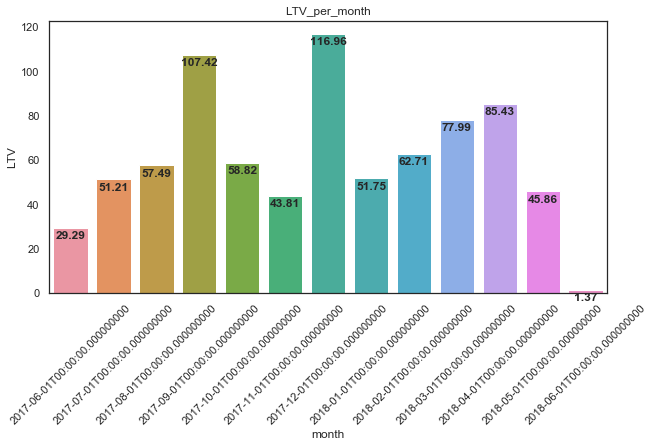

In [36]:
#money spend per month
orders_per_month = orders.groupby('month').agg({'uid':'nunique','revenue':'sum'}).reset_index()
orders_per_month.columns = ['month', 'n_buyers','revenue']

#calcularing ltv
margin =0.4
orders_per_month['gp'] = orders_per_month['revenue'] * margin
#report['age'] = ((report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')).round().astype(int)
orders_per_month['ltv'] = orders_per_month['gp'] / orders_per_month['n_buyers']
orders_per_month

#LTV by source:graphical representation
plt.figure(figsize=(10,5))
month_order_bar = sns.barplot(x = 'month',y = 'ltv',data = orders_per_month)
plt.title('LTV_per_month')
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('LTV')

for row in month_order_bar.patches:
    month_order_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

We consider the margin as 0.4 as the average is 40% & we do not have enough information to calculate it.
LTV for the month 2017-12-01 & 2017-12-01 was significantly high.

### General conclusion for Sales:

From the pivot table we get the general idea about, when did customer visited & when did they actually ordered. This gives us information about customers conversion.

On an average buying time is 23430 minutes that is around 16 days.

Checked for the orders made by them during a given period of time & got the information that maximum number of order were there during these months: 2017-10-01 & 2017-11-01 & 2017-12-01

On an average purchase size is 5
Source_avg_revenue : On an average orders from platform 2 generates more revenue as compared to others. Average revenue was around 11.

In order to know the amount of revenue that users generated overtime was done by calculating LTV(lifetime value). It is calculated by dividing the revenue by number of users.
Souce_LTV: platform 2 & platform 3 is clearly the leaders
Monthly_LTV: month 2017-12-01 & 2017-12-01 was significantly high

### Marketing

#### How much money was spent? Overall/per source/over time

In [37]:
expenses['month'] = expenses['dt'].astype('datetime64[M]')

In [38]:
# money spent per source
costs_per_source = expenses.groupby('source_id').agg({'costs':'sum'}).reset_index()
costs_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


On Source 3 there was huge amount of money spent. Source 3 costed around $ 1,41,321

In [39]:
# money spent over time
cost_per_month = expenses.groupby('month').agg({'costs':'sum'}).reset_index()
cost_per_month

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


From month 2017-10-01 till 2018-03-01 huge amount of money was spent.

In [40]:
print('Total_cost:',expenses['costs'].sum())

Total_cost: 329131.62


Overall $ 3,29,232 money was spent.

#### How much did customer acquisition from each of the sources cost?

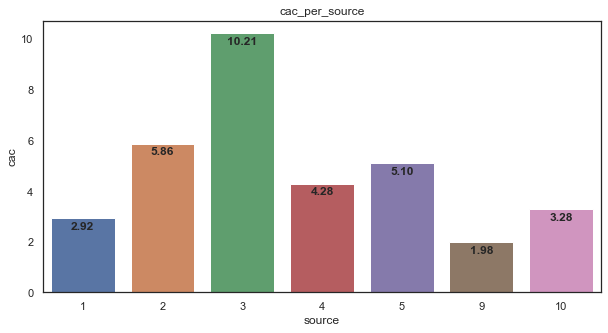

In [41]:
#CAC by source
nbuyers_per_source = orders.groupby('source_id').agg({'uid':'nunique'}).reset_index()
nbuyers_per_source.columns = ['source_id', 'n_buyers']
cac_source = pd.merge(costs_per_source, nbuyers_per_source, on='source_id' )
cac_source['cac'] = cac_source['costs'] / cac_source['n_buyers']

#CAC by source:graphical representation
plt.figure(figsize=(10,5))
source_costs_bar = sns.barplot(x = 'source_id',y = 'cac',data = cac_source)
plt.title('cac_per_source')
plt.xlabel('source')
plt.ylabel('cac')

for row in source_costs_bar.patches:
    source_costs_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

Source 3 had heighest customer acquisition costs as compared to rest other sources.

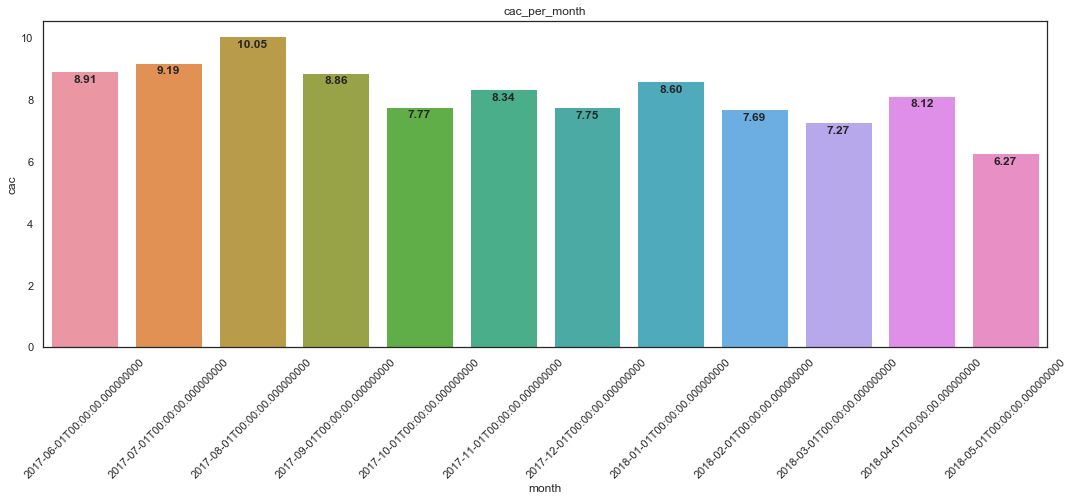

In [42]:
#CAC by month
cost_per_month = expenses.groupby('month').agg({'costs':'sum'}).reset_index()
nbuyers_per_month = orders.groupby('month').agg({'uid':'nunique'}).reset_index()
nbuyers_per_month.columns = ['month', 'n_buyers']
cac_month = pd.merge(cost_per_month, nbuyers_per_month, on='month' )
cac_month['cac'] = cac_month['costs'] / cac_month['n_buyers']

#CAC by month:graphical representation
plt.figure(figsize=(18,6))
month_costs_bar = sns.barplot(x = 'month',y = 'cac',data = cac_month)
plt.title('cac_per_month')
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('cac')

for row in month_costs_bar.patches:
    month_costs_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

Customer Acquisition Costs for these months: '2017-10-01','2012-07-01,'2018-02-01','2018-03-01'were low as compared to other months.

#### How worthwhile where the investments? (ROI)

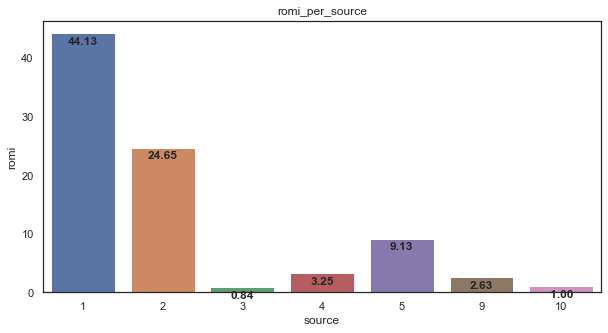

In [43]:
#ROI(ROMI) by source
#merging the order_source table & cac_source_table
source_romi = orders_per_source.merge(cac_source,on='source_id')
#calcilating romi
source_romi['romi'] = source_romi['ltv'] / source_romi['cac']


#CAC by source:graphical representation
plt.figure(figsize=(10,5))
source_romi_bar = sns.barplot(x = 'source_id',y = 'romi',data = source_romi)
plt.title('romi_per_source')
plt.xlabel('source')
plt.ylabel('romi')

for row in source_romi_bar.patches:
    source_romi_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

Return on marketing investment platform 1 was clearly the leader & platform 2 also shows good ROMI.

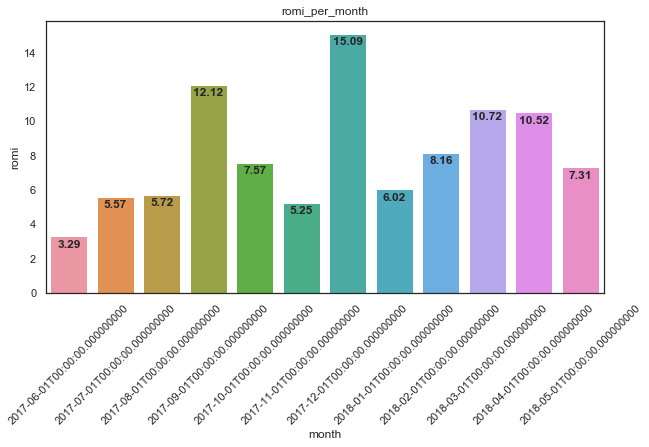

In [44]:
#ROI(ROMI) by cohort 
#merging the order_month table & cac_month table
month_romi = orders_per_month.merge(cac_month,on='month')
#calcilating romi
month_romi['romi'] = month_romi['ltv'] / month_romi['cac']


#CAC by source:graphical representation
plt.figure(figsize=(10,5))
month_romi_bar = sns.barplot(x = 'month',y = 'romi',data = month_romi)
plt.title('romi_per_month')
plt.xlabel('month')
plt.xticks(rotation=45)
plt.ylabel('romi')

for row in month_romi_bar.patches:
    month_romi_bar.annotate(format(row.get_height(),'.2f'),(row.get_x()+row.get_width()/2.,row.get_height()),
                   ha='center',va='center', xytext=(0,-8),textcoords='offset points',weight='bold')
plt.show()

On the month '2017-12-01' return on marketing investment was significantly high,followed by this month '2017-09-01'.

In [45]:
#Find total revenue per source/cohort
revenue_per_source =orders.groupby('source_id').agg({'revenue':'sum'}).reset_index()
revenue_per_source

,source_id,revenue
0,1,2.298200e+06
1,2,2.638189e+06
2,3,2.966880e+05
3,4,4.966902e+05
4,5,1.181477e+06
5,7,1.220000e+00
6,9,3.634225e+04
7,10,1.461923e+04


Total revenue based on platform. So we can see that platform 4 & platform 9 generates much more revenue as compared to other platforms.

In [46]:
#Find total cost per source/cohort
cost_per_source =expenses.groupby('source_id').agg({'costs':'sum'}).reset_index()
cost_per_source

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


Platform 3 cost significantly high as compared to other platforms.

In [47]:
#Merge these tables and find profit per source/cohort (revenue-cost)
source_revenue_cost = revenue_per_source.merge(cost_per_source,on='source_id')
source_revenue_cost['profit'] = (source_revenue_cost['revenue'] - source_revenue_cost['costs']).round()
source_revenue_cost

,source_id,revenue,costs,profit
0,1,2.298200e+06,20833.27,2277367.0
1,2,2.638189e+06,42806.04,2595383.0
2,3,2.966880e+05,141321.63,155366.0
3,4,4.966902e+05,61073.60,435617.0
4,5,1.181477e+06,51757.10,1129720.0
5,9,3.634225e+04,5517.49,30825.0
6,10,1.461923e+04,5822.49,8797.0


The most profitable "source 2" has the highest profit followed by "source 1". We can also see that costs for source 3 is significantly high as compared to other source & revenue generated from that is not much to conclude profit from source 3 is not good based on amount of money spend.

In [48]:
total_revenue =orders.revenue.sum()
total_costs = expenses.costs.sum()
profit = (total_revenue - total_costs).round()
print(profit)

6633076.0


### General Conclusion for Marketing:

Source: On Source 3 there was huge amount of money spent. Costed around $ 1,41,321
Month: From month 2017-10-01 till 2018-03-01 huge amount of money was spent
Overall 3,29,232 money was spent.

Source: Source 3 had heighest customer acquisition costs as compared to rest other sources
Month: Only these months'2017-10-01','2012-07-01,'2018-02-01','2018-03-01' had low CAC as compared to other months.

Investments on platform 1 & platform 2 was clearly worth it.
Investments on these month '2017-12-01' & month '2017-09-01' was worth investing.

Source:Total Revenue from platform 4 & platform 9 was heigher as compared to other platforms.
Source:Total Costs from Platform 3 was significantly high as comparde to other platforms.
The most profitable platforms were: "source 2" followed by "source 1"
LTV > CAC as ROMI value is good, that means business is healthy.

## Step 3. Write a conclusion: advise marketing experts how much money to invest and where.

Products:
We calculated the number of daily active users(DAU),number of weekly active users(WAU), number of monthly active users(MAU). From this we get an idea about unique number of users viting every day, week & month.
Stickly factors gives us informtaion about loyal the cstomers are giving us information about how often they return so 15% users return weekly & 3% users return monthly.

60 seconds is the length of each sessions.
When looking at different platforms got to know that:Platform 4 dominates all the other platform when it come to number of sessions & when it comes to avg length of each session then in that case platform 6 is clearly the leader.

Orders:
After getting the idea about when did customer visited & when did they actually ordered. This gives us information about customers conversion. Average buying time is 23430 minutes that is around 16 days. Maximum number of order were there during these months: 2017-10-01 & 2017-11-01 & 2017-12-01. 

Average purchase size is 5. Platform 2 generates more revenue. 
Calculated LTV to the total amount of money customers bring to the company,
Souce_LTV: platform 2 & platform 3 is clearly the leaders
Monthly_LTV: month 2017-12-01 & 2017-12-01 was significantly high

Costs:
Source: On Source 3 there was huge amount of money spent
Month: From month 2017-10-01 till 2018-03-01 huge amount of money was spent
Overall 3,29,232 money was spent.
CAC: Source 3 had heighest customer acquisition costs
lower CAC: These months'2017-10-01','2012-07-01,'2018-02-01','2018-03-01' had low CAC
ROMI: Investments on platform 1 & platform 2 was clearly worth
ROMI: Investments on these month '2017-12-01' & month '2017-09-01' was worth


Metrics that gives us information about how much money to invest and where:

DAU: Number of daily active users
MAU: Number of monthly active users
WAU: Number of weekly active users
sticky_factors: Monthly uses come back (MAU/ DAU) & weekly users come back (WAU/DAU)

retension: how often do users come back
conversion: tells us about how many people logged in and when did they did their first purchase that tells us about the conversion. This also helps us with the information how long users took to convert.

LTV: lifetime value (per month & per source)
CAC: Customer Acquisition Cost (per month & per source)
ROMI (return on marketing investment) by month : LTV / CAC (per month & per source)
As lifetime value > customer acquisition cost so we can say that the business is healty, as costs less amount in acquiring each customer and each customer brings in more revenue.

To Conclude:
Now we know that length of each session is 60 seconds.Platform 4 had the height number of sessions but average time spend on platform 6 is much more. Average buying time is around 16 days. Maximum number of orders were placed during OCT 2017 & NOV 2017 & DEC 2017. Customers coming from Source 3 costs significantly high.Money spend during these month 2017-10-01 till 2018-03-01 are huge.Source 3 had heighest customer acquisition costs.These months'2017-10-01','2012-07-01,'2018-02-01','2018-03-01' had low CAC.Investments on platform 1 & platform 2 was clearly worth.Investments on these month '2017-12-01' & month '2017-09-01' was worth.

The most profitable platforms were: "source 2" followed by "source 1".Total revenue i.e (revenue-costs) is 6,63,3076
Though pltform 4 had maximum count of session & average time spend was higher on platform 6 , still Platform 1 & platform 2 had heighest ROI & profit.

platform 1: 34121 number of unique users, 1039.36 seconds average visits duration, 128.78 customers bring to the company,  2.92 spends on customer acquisition,  44.13 return on marketing spends.

platform 2: 47626 number of unique users, 844.72 seconds average visits duration,  144.46 customers bring to the company,  5.86 spends on customer acquisition,  24.65 return on marketing spends.